In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [12]:
data = pd.read_csv("E:\\github\\DS-Olympus-\\machineLearning\\fetalHealthClassification\\Dataset\\fetal_health.csv")
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [13]:
data.columns
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

(2126, 22)

In [14]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [15]:
# are there any null values???
print(data.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [16]:
features = data.drop("fetal_health", axis=1)
target = data["fetal_health"]
print("------------------------------------------FEATURES-------------------------------------------------")
print(features)
print(" ")
print("------------TARGET----------------")
print(target)

------------------------------------------FEATURES-------------------------------------------------
      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002  

In [17]:
# feature scaling
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
print(new_features)

[[0.25925926 0.         0.         ... 0.40366972 0.27137546 1.        ]
 [0.48148148 0.31578947 0.         ... 0.57798165 0.04460967 0.5       ]
 [0.5        0.15789474 0.         ... 0.55963303 0.04832714 0.5       ]
 ...
 [0.62962963 0.05263158 0.         ... 0.68807339 0.01486989 1.        ]
 [0.62962963 0.05263158 0.         ... 0.67889908 0.01486989 1.        ]
 [0.66666667 0.10526316 0.004158   ... 0.62385321 0.00371747 0.5       ]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=120)

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
# train and test score
print("training score: ",model.score(x_train,y_train))
print("testing score: ",model.score(x_test,y_test))

training score:  0.8989962358845671
testing score:  0.8834586466165414


In [20]:
y_pred = model.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-----------------CLASSIFICATION REPORT---------------------")
print(cr)

-----------------CLASSIFICATION REPORT---------------------
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       412
         2.0       0.64      0.64      0.64        77
         3.0       0.83      0.70      0.76        43

    accuracy                           0.88       532
   macro avg       0.80      0.76      0.78       532
weighted avg       0.88      0.88      0.88       532



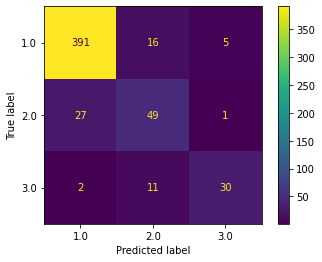

In [21]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [22]:
# predictions on known data
d = [[120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1]]
t_d = scaler.transform(d)
lst=["Normal","Pathological","Suspect"]
print("The fetus is: ", lst[int(model.predict(t_d))-1])
print(model.predict_proba(t_d))

The fetus is:  Suspect
[[0.15188616 0.1891854  0.65892844]]


In [23]:
# predictions on known data
d = [[132,0.006,0,0.006,0.003,0,0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0]]
t_d = scaler.transform(d)
lst=["Normal","Pathological","Suspect"]
print("The child is: ", lst[int(model.predict(t_d))-1])
print(model.predict_proba(t_d))

The child is:  Normal
[[9.97566102e-01 2.25668004e-03 1.77217761e-04]]


In [24]:
# predictions on unknown data

d = [[152,0.06,0.028,0.76,0.083,0,0,15,1.5,0,10.4,110,80,128,6,1,121,106,140,20,0.005]]
t_d = scaler.transform(d)
lst=["Normal","Pathological","Suspect"]
print("The child is: ", lst[int(model.predict(t_d))-1])
print(model.predict_proba(t_d))

The child is:  Normal
[[1.00000000e+00 7.14018397e-73 1.01781773e-60]]
